In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [6]:
dataset_dir='./Object Detection(Ass6)/caltech-101-img'

dataset_datagen=ImageDataGenerator(
    rescale=1.0/255
)

batch_size=2000

dataset_generator=dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [7]:
x_train,y_train=dataset_generator[0]
x_test,y_test=dataset_generator[1]

print(len(x_train))
print(len(y_train))

2000
2000


In [10]:
# base_model=VGG16(weights="imagenet",include_top=False,input_shape=(64,64,3))
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

In [11]:
for layer in base_model.layers:
    layer.trainable=False

In [12]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [17]:
x=Flatten()(base_model.output)
x=Dense(64,activation='relu')(x)
predictions=Dense(102,activation='softmax')(x)


model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [19]:
model.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
32/32 [==============================] - 47s 1s/step - loss: 3.8298 - accuracy: 0.2195 - val_loss: 3.3067 - val_accuracy: 0.3165
Epoch 2/10
32/32 [==============================] - 59s 2s/step - loss: 2.9033 - accuracy: 0.3920 - val_loss: 2.8724 - val_accuracy: 0.3935
Epoch 3/10
32/32 [==============================] - 53s 2s/step - loss: 2.3888 - accuracy: 0.4930 - val_loss: 2.5544 - val_accuracy: 0.4455
Epoch 4/10
32/32 [==============================] - 51s 2s/step - loss: 1.9911 - accuracy: 0.5715 - val_loss: 2.3339 - val_accuracy: 0.4755
Epoch 5/10
32/32 [==============================] - 53s 2s/step - loss: 1.6937 - accuracy: 0.6270 - val_loss: 2.1615 - val_accuracy: 0.5140
Epoch 6/10
32/32 [==============================] - 53s 2s/step - loss: 1.4662 - accuracy: 0.6735 - val_loss: 2.0801 - val_accuracy: 0.5310
Epoch 7/10
32/32 [==============================] - 53s 2s/step - loss: 1.2930 - accuracy: 0.7095 - val_loss: 1.9918 - val_accuracy: 0.5350
Epoch 8/10
32/32 [==

In [21]:
import matplotlib.pyplot as plt
predicted_value=model.predict(x_test)

63/63 [==============================] - 22s 345ms/step


In [22]:
labels = list(dataset_generator.class_indices.keys())


Preditcted:  airplanes
Actual:  airplanes


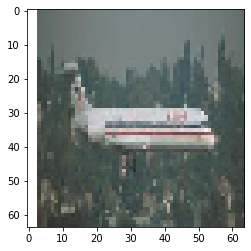

In [23]:
n = 1001
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])